# Telco Customer Churn Analysis

### Project Overview

The objective of this project is to analyse customer data from a telecommunications company 
to understand the factors that influence customer churn and to build a machine learning 
model that predicts the likelihood of churn.

This notebook focuses on initial data exploration, understanding data structure, 
and identifying potential data quality issues before modelling.

### Dataset Description

The dataset contains customer-level information including demographic attributes, 
account information, service usage, and billing details.

Target Variable:
- **Churn**: Indicates whether the customer has left the company (Yes/No)

The dataset is publicly available and contains anonymised records, 
making it suitable for ethical and compliant analysis.

## 1. Data Exploration & Understanding

### 1.1 Import all necessary libraries for data analysis

In [23]:

import pandas as pd           # Data manipulation and analysis
import numpy as np            # Numerical computations
import matplotlib.pyplot as plt  # Static visualizations
import seaborn as sns         # Statistical visualizations
import warnings
warnings.filterwarnings('ignore')

# Configure pandas display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Don't wrap columns

# Configure plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# WHAT THIS DOES: 
# - pandas: read and manipulate CSV files
# - numpy: perform mathematical operations
# - matplotlib: create static charts
# - seaborn: create beautiful statistical plots

print("Libraries imported successfully!")

Libraries imported successfully!


### 1.2 Load Dataset

In [24]:
# Load the dataset from CSV file
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# WHAT THIS DOES:
# - Reads the CSV file and creates a pandas DataFrame
# - A DataFrame is like an Excel spreadsheet in Python

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (7043, 21)


- 7,043 rows = 7,043 customers
- 21 columns = 21 customer attributes

### Dataset Size and Structure
The dataset contains 7,043 customer records and 21 variables. Each row represents an individual customer, while the columns describe customer demographics, service usage, account information, and the target variable (Churn). The dataset size is sufficient to perform exploratory data analysis and build reliable machine learning models.

### 1.3 Display First Rows

In [25]:
# Display first 5 rows to understand data structure
print("First 5 rows of the dataset:")
print(df.head())

# WHAT THIS DOES:
# - head() shows the first 5 rows by default
# - Helps you see the structure and types of data

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0        

### 1.4 Dataset Information

In [26]:
# Get detailed information about the dataset
print("Dataset Information:")

df.info()

# WHAT THIS DOES:
# - Shows column names, data types, and non-null counts
# - Helps identify missing values and data type issues

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

### Data Types and Structure
The dataset consists of 7,043 customer records with 21 variables. Most features are categorical, while numerical features include tenure, MonthlyCharges, and SeniorCitizen. The target variable, Churn, indicates whether a customer has left the service.

No missing values were detected across the dataset. However, the TotalCharges column is stored as an object data type instead of a numeric type, which requires cleaning before further statistical analysis and modelling.

### 1.5 Check Missing Values

In [27]:
# Identify and count missing values
print("Missing Values:")

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print(f"\nTotal missing values: {df.isnull().sum().sum()}")

print(f"\nData Quality Score: {((len(df) * len(df.columns) - df.isnull().sum().sum()) / (len(df) * len(df.columns)) * 100):.2f}%")

# WHAT THIS DOES:
# - Counts how many missing (NaN) values are in each column
# - Helps identify data quality issues

Missing Values:
Series([], dtype: int64)

Total missing values: 0

Data Quality Score: 100.00%


### 1.6 Statistical Summary

In [28]:
# Get statistical summary of numerical columns
print("Statistical Summary of Numerical Columns:")

print(df.describe())

# WHAT THIS DOES:
# - Shows count, mean, std, min, 25%, 50%, 75%, max
# - Helps understand data distribution and range

Statistical Summary of Numerical Columns:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


### Statistical Summary (Key Insights)

- **SeniorCitizen**: ~16% of customers are senior citizens (binary feature, low variance).
- **Tenure**: Customers stay on average ~32 months, with wide spread (0–72 months).
- **MonthlyCharges**: Average charge is ~£65, ranging from low-cost (~£18) to high-cost (~£119) plans.


### 1.7 Categorical Data Overview

In [29]:
# Explore categorical (text) columns

print("Categorical Columns & Their Unique Values:")


categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Features ({len(categorical_cols)}):")

for col in categorical_cols[:5]:  # Limiting to first 5 for brevity
    print(f"\n{col}:")
    #print(df[col].value_counts())
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Values: {df[col].unique()}")

# WHAT THIS DOES:
# - Shows all unique values in each categorical column
# - Helps understand categorical data options

Categorical Columns & Their Unique Values:
Categorical Features (18):

customerID:
  Unique values: 7043
  Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender:
  Unique values: 2
  Values: ['Female' 'Male']

Partner:
  Unique values: 2
  Values: ['Yes' 'No']

Dependents:
  Unique values: 2
  Values: ['No' 'Yes']

PhoneService:
  Unique values: 2
  Values: ['No' 'Yes']


### Categorical Features (Brief Overview)

- **customerID**: Unique identifier for each customer (7043 unique values).
- **gender**: Binary category (Male, Female).
- **Partner**: Indicates if the customer has a partner (Yes/No).
- **Dependents**: Indicates dependent status (Yes/No).
- **PhoneService**: Whether phone service is active (Yes/No).


### 1.8  Target Variable Analysis

In [30]:
# Analyze the target variable (Churn)

print("Churn Distribution:")

churn_counts = df['Churn'].value_counts()
print(churn_counts)

print("\nChurn Percentage:")
churn_pct = df['Churn'].value_counts(normalize=True) * 100
print(churn_pct)

# WHAT THIS DOES:
# - Shows how many customers churned vs didn't churn
# - Calculates percentages for better understanding

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


### Churn Distribution (Summary)

- **No Churn**: 5,174 customers (73.5%)
- **Churn**: 1,869 customers (26.5%)

➡️ Roughly **1 in 4 customers churn**, indicating a moderately imbalanced target variable.


### 1.9 Visualization - Churn Distribution

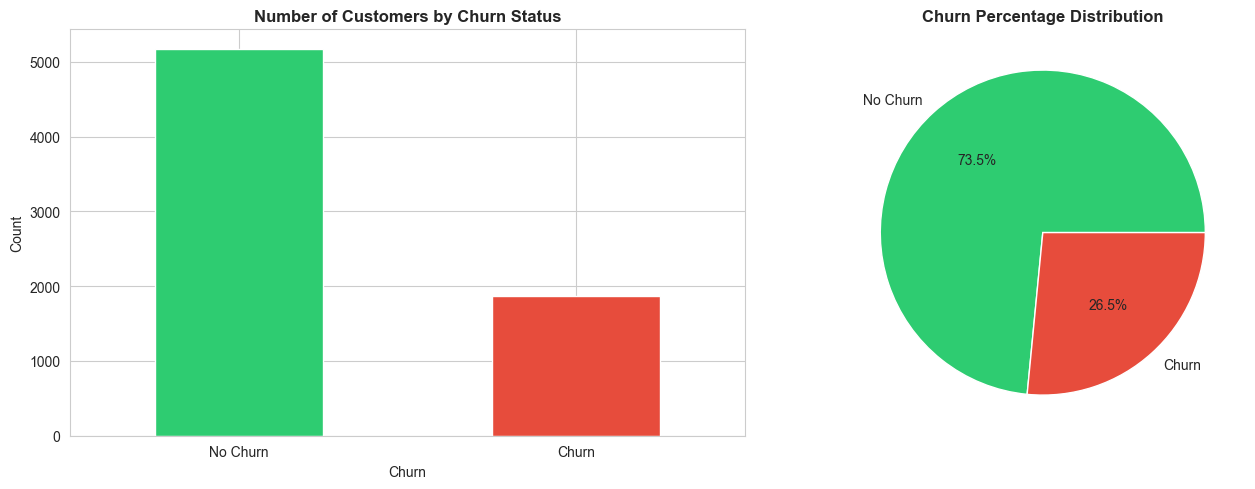

In [31]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar Chart
churn_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Number of Customers by Churn Status', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Churn', 'Churn'], rotation=0)

# Pie Chart
axes[1].pie(churn_counts.values, labels=['No Churn', 'Churn'], 
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Churn Percentage Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/01_churn_distribution.png', dpi=300)
plt.show()

- LEFT (Bar Chart):  Shows ~5,174 "No Churn" and ~1,869 "Churn"
- RIGHT (Pie Chart): Shows 73.5% vs 26.5% split with clear colors

### 1.10 Numerical Features Distribution

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


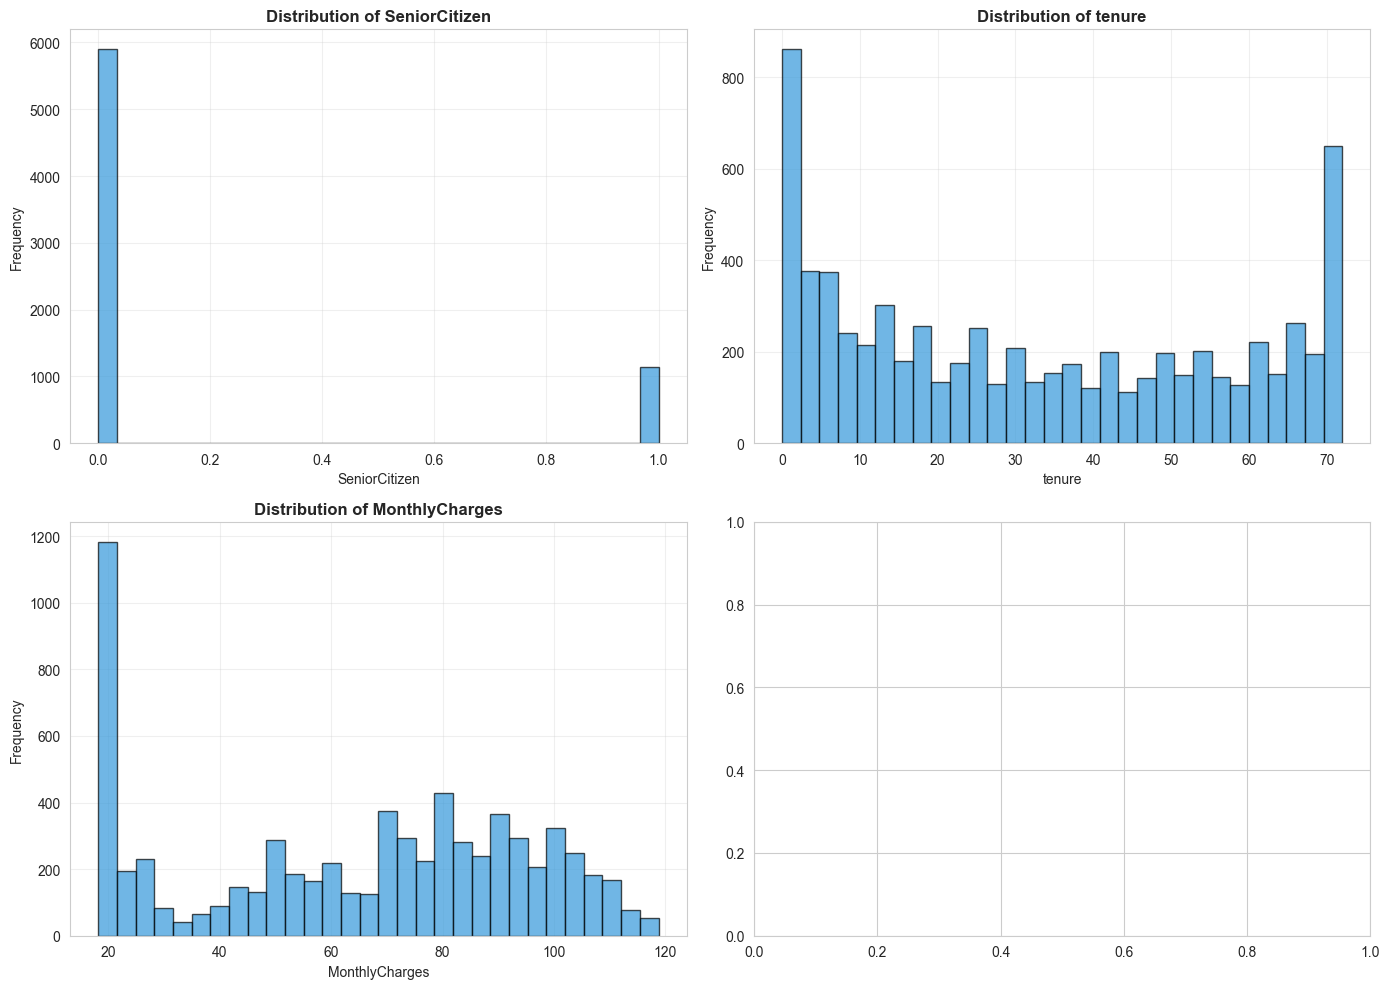

Numerical distributions visualization saved!


In [32]:
# Visualize distribution of numerical features

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:4]):
    if col != 'Churn':
        axes[idx].hist(df[col], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../data/processed/02_numerical_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Numerical distributions visualization saved!")

# WHAT THIS DOES:
# - Histograms show the distribution of numerical values
# - Helps identify skewness and outliers

- 4 histograms showing distributions
- Total Charges: right-skewed
- Tenure: Right-skewed (many new customers, few long-term)
- Monthly Charges: Fairly uniform distribution
- SeniorCitizen: Binary distribution (0 or 1)

### 1.11 Summary Statistics

In [33]:
# Print comprehensive summary


print("DATA EXPLORATION SUMMARY")



print(f"Total Records: {len(df):,}")

print(f"Total Features: {len(df.columns)}")

print(f"Missing Values: {df.isnull().sum().sum()}")

print(f"Numerical Features: {len(df.select_dtypes(include=['int64', 'float64']).columns)}")

print(f"Categorical Features: {len(df.select_dtypes(include=['object']).columns)}")

print(f"Target Variable (Churn) Distribution:")

print(f"   - No Churn: {churn_counts['No']} ({churn_pct['No']:.1f}%)")

print(f"   - Churn: {churn_counts['Yes']} ({churn_pct['Yes']:.1f}%)")


# WHAT THIS DOES:
# - Creates a nice summary of what we learned

DATA EXPLORATION SUMMARY
Total Records: 7,043
Total Features: 21
Missing Values: 0
Numerical Features: 3
Categorical Features: 18
Target Variable (Churn) Distribution:
   - No Churn: 5174 (73.5%)
   - Churn: 1869 (26.5%)
